In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [5]:
# Define the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input images
    Dense(512, activation='relu'),      # Fully connected layer with 512 units
    Dense(256, activation='relu'),      # Fully connected layer with 256 units
    Dense(128, activation='relu'),      # Fully connected layer with 128 units
    Dense(10, activation='softmax')     # Output layer with 10 units for 10 classes
])




In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
32*32

1024

In [10]:
x_train[0].shape


(32, 32, 3)

In [13]:
def display(
    images, n=10, size=(20, 3), cmap="gray_r", as_type="float32", save_to=None
):
    """
    Displays n random images from each one of the supplied arrays.
    """
    if images.max() > 1.0:
        images = images / 255.0
    elif images.min() < 0.0:
        images = (images + 1.0) / 2.0

    plt.figure(figsize=size)
    for i in range(n):
        _ = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].astype(as_type), cmap=cmap)
        plt.axis("off")

    if save_to:
        plt.savefig(save_to)
        print(f"\nSaved to {save_to}")

    plt.show()

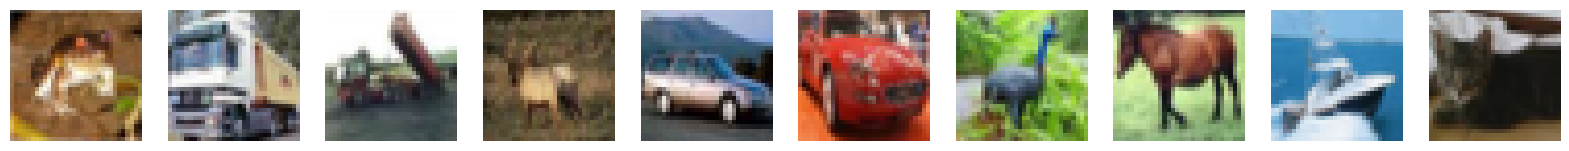

In [14]:
display(x_train[:10])

In [16]:
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.8565 - accuracy: 0.3279 - val_loss: 1.8196 - val_accuracy: 0.3495
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6760 - accuracy: 0.3959 - val_loss: 1.6506 - val_accuracy: 0.4090
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.5995 - accuracy: 0.4260 - val_loss: 1.5334 - val_accuracy: 0.4433
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5430 - accuracy: 0.4479 - val_loss: 1.5197 - val_accuracy: 0.4551
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5035 - accuracy: 0.4615 - val_loss: 1.5161 - val_accuracy: 0.4558
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4646 - accuracy: 0.4755 - val_loss: 1.5528 - val_accuracy: 0.4461
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4365 - accuracy: 0.4845 - val_loss: 1.5000 -

In [18]:

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 1.4345 - accuracy: 0.4926
Test accuracy: 0.4925999939441681


In [21]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 2s 6ms/step


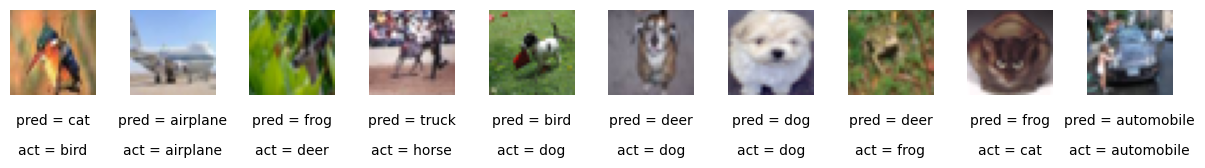

In [22]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)